In [5]:
import json
import sys
import pandas as pd
import numpy as np

from scipy import stats

#data = sys.stdin.read()

data_dict = data = [
{"supplier_name": 'PaaS 8',"service_availability": 8, "data_and_system_hosting": 8, "data_security_controls": 9},
{"supplier_name": 'Identity CSP',"service_availability": 7, "data_and_system_hosting": 9, "data_security_controls": 8},
{"supplier_name": 'Billing CSP',"service_availability": 8, "data_and_system_hosting": 7, "data_security_controls": 8}
]

data = json.dumps(data)

#df = pd.read_json(json_data)
df = pd.read_json(data).set_index('supplier_name')

calculate_zscore_of_data = df.apply(stats.zscore, ddof=1)
#k = calculate_zscore_of_data.mean()

k = np.mean(calculate_zscore_of_data)

calculate_zscore_of_data = calculate_zscore_of_data.assign(average_my_zscore=pd.Series(k).values)

data_with_index_reset = calculate_zscore_of_data.reset_index()

response_data = data_with_index_reset.to_json(orient='records')

print('zscores' + ' ' + str(response_data) )


zscores [{"supplier_name":"PaaS 8","data_and_system_hosting":0.0,"data_security_controls":1.1547005384,"service_availability":0.5773502692,"average_my_zscore":0.0},{"supplier_name":"Identity CSP","data_and_system_hosting":1.0,"data_security_controls":-0.5773502692,"service_availability":-1.1547005384,"average_my_zscore":-0.0},{"supplier_name":"Billing CSP","data_and_system_hosting":-1.0,"data_security_controls":-0.5773502692,"service_availability":0.5773502692,"average_my_zscore":-5.181040782e-16}]


random_num_for_prob_without_ce [0.03421208 0.02699808 0.0162435  0.00182375 0.04601325 0.01256633
 0.04037269 0.0202389  0.03644512 0.02842025 0.04565834 0.00337661
 0.02011995 0.02085663 0.04973282 0.04207553 0.03240989 0.03628424
 0.00142775 0.02306747 0.03333048 0.00728009 0.00799817 0.0437984
 0.02813325 0.04104229 0.01375253 0.0197963  0.03101018 0.03775016
 0.01284831 0.0191764  0.00692482 0.02860779 0.01913832 0.00336437
 0.02381533 0.02422808 0.04824295 0.03149179 0.01588584 0.02357123
 0.04381253 0.01850253 0.02771892 0.01639327 0.03157953 0.04823064
 0.04306245 0.00845119 0.03453193 0.02378974 0.02251077 0.03356343
 0.02118455 0.00993251 0.03767805 0.0089861  0.04462521 0.02555722
 0.04025175 0.0471058  0.04632773 0.01378938 0.02970125 0.01973034
 0.00017624 0.02833923 0.0437148  0.00193757 0.01923278 0.03115611
 0.04568017 0.01511605 0.04058364 0.01338713 0.03145721 0.00772524
 0.02206575 0.03837916 0.04296147 0.03248707 0.02285271 0.02224423
 0.01708437 0.04765576 0.0198048

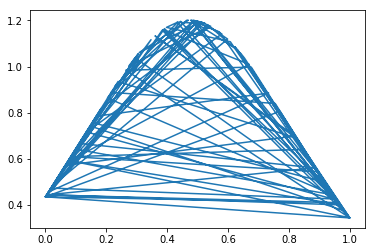

prob_with_ce [0.98189327 0.00114407 0.99885256 0.61058993 0.46301623 0.67324831
 0.98990615 0.7842278  0.13673083 1.        ]
impart random [462274 179927 258899 238118 261985 580578  81186 230515 545196 513330
 565581 233486 283152 184198 365844 327878 369708 494682 397265 261985
 460437 222506 263519 300940  96979 183924 432409 188927 454333 617567
 367171 565173  43958  68100 234079  20092 260841  52709 400612 204389
 619606  16613 527605 209448 452122 336082 394178  74210 474119 135320
 239958 533406 388165 180602 409186 494009 493015 440232 549753 316891
 612942 261000 501700 147494 127046  71019 366876 151602 390390 184171
 179294 447241 368614 587287   5830 272505 397695 467727 174918 318481
 596486 592114  21198 352716 431944 369346 496646  37136 278761 619215
 204739 465035 275348 213381 141657 585752 278410 311264  84442  90995]
impact intermediate 248333.33333333334
impact pert [9.61069626e-01 3.09778202e-01 5.56723351e-01 4.92603059e-01
 5.66059666e-01 9.99567226e-01 6.1106

In [11]:
#https://github.com/NAVADMC/ADSM/issues/331#issuecomment-133486023
import scipy
from scipy import stats
from scipy.stats import beta
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

random_num_for_prob_without_ce = np.random.uniform(low=0, high=0.05, size=100)
print ('random_num_for_prob_without_ce' + ' ' + str(random_num_for_prob_without_ce) )

#prob_without_ce from expert 1
min = 0
mode = 0.03
max = 0.05

d = (min + 4*mode + max)/6
#print d
alpha = 6*((d - min)/(max - min))
beta = 6*((max - d)/(max - min))

location = min
scale = max - min

prob_without_ce = scipy.stats.beta.cdf(random_values, alpha,beta,location, scale)
print ('prob_without_ce' + ' ' + str(prob_without_ce))
mean = np.median(prob_without_ce)
std_dev = np.std(prob_without_ce)
print (format(m, '.6f'))

plt.plot(prob_without_ce, norm.pdf(prob_without_ce, mean, std_dev))
plt.show()

#prob_with_ce from expert 1
random_num_for_prob_with_ce = np.random.uniform(low=0, high=0.03, size=10)
minn = 0
modee = 0.01
maxx = 0.03

dd = (minn + 4*modee + maxx)/6
alphaa = 6*((dd - minn)/(maxx - minn))
betaa = 6*((maxx - dd)/(maxx - minn))

locationa = minn
scalea = maxx - minn

prob_with_ce = scipy.stats.beta.cdf(random_num_for_prob_with_ce, alphaa,betaa,locationa, scalea)
print ('prob_with_ce' + ' ' + str(prob_with_ce))

#impact from expert 1
impact_random_numbers = np.random.randint(low=5000, high=625000, size=100)
#impact_random_numbers = np.random.randint(5000, 625000, size=100)

print ('impart random' + ' ' + str(impact_random_numbers) )
mini = 5000
modi = 215000
maxi = 625000

dm = (mini + 4*modi + maxi)/6
print ("impact intermediate"  + ' ' + str(dm) )
alpham = 6*((dm - mini)/(maxi - mini))
betam = 6*((maxi - dm)/(maxi - mini))

locationi = mini
scali = maxi - mini

impact = scipy.stats.beta.cdf(impact_random_numbers, alpham, betam, locationi, scali)

print ('impact pert' + ' ' + str(impact))


